In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Set darkgrid style from seaborn

In [42]:
sns.set_style(style="darkgrid")

Bar plots

In [95]:
income = [100, 80, 150, 48, 52, 69, 88]
expense = [30, 100, 100, 20, 75, 50, 28]
#new = [22 ,44 ,123, 150, 100, 120, 220]
index = ['A', 'B', 'C','D', 'E', 'F', 'G']
df = pd.DataFrame({'income': income,'expense': expense,}, index=index)
df.head()

,income,expense
A,100,30
B,80,100
C,150,100
D,48,20
E,52,75


# 2. Make a bar plot

<AxesSubplot:>

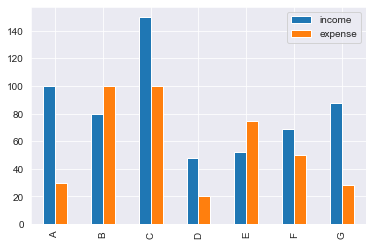

In [59]:
# First Solution
df.plot.bar()

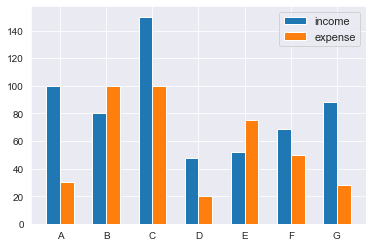

In [78]:
# Second Solution
fig, ax = plt.subplots()
p = np.arange(len(index))
width = 0.3
ax.bar(p - width/2, income, width=width, label="income")
ax.bar(p + width/2, expense, width=width, label="expense")
ax.set_xticks(p)
ax.set_xticklabels(index)
plt.legend(fontsize=11)

plt

<AxesSubplot:>

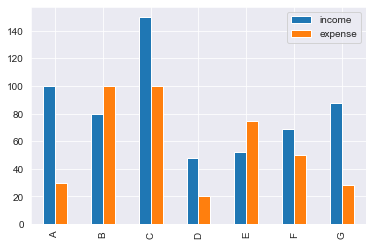

In [90]:
#Solutşon 3
df.plot(kind="bar")

In [6]:
# Answer

# 3. Stack the bars

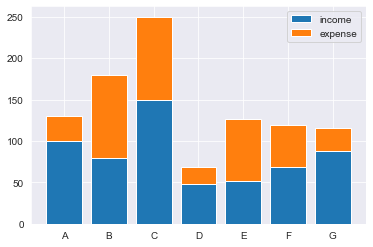

In [99]:
# Solution 2
fig, ax = plt.subplots()
p = np.arange(len(index))
ax.bar(p, income,  label = "income")
ax.bar(p,  expense,  label = "expense" ,bottom= income)
ax.set_xticks(p)
ax.set_xticklabels(index)
plt.legend();

<AxesSubplot:>

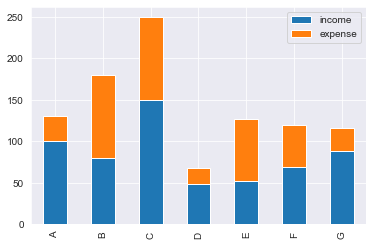

In [100]:
df.plot.bar(stacked=True)

In [8]:
#Answer

# 3. Rotate the labels and set figsize

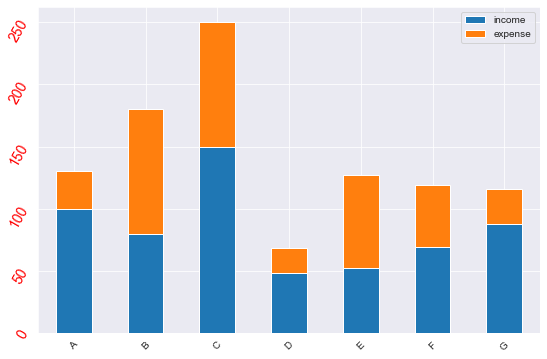

In [114]:
#Solution 2
df.plot.bar(stacked=True, figsize=(9,6))
plt.xticks(rotation=45)
plt.yticks(rotation=60, color="r", fontsize=14);

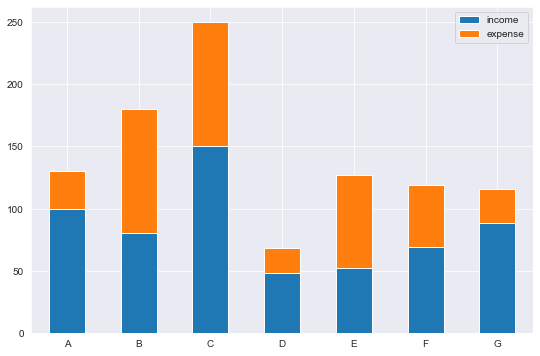

In [118]:
df.plot.bar(stacked=True, figsize=(9,6), rot=0);


In [10]:
# Answer

# 4. Replace the labels by "Game-1", "Game-2", "Game-3", "Game-4", "Game-5", "Game-6", "Game-7"
# 5. Unstuck the bars, annotate the hight of the bars on top of them

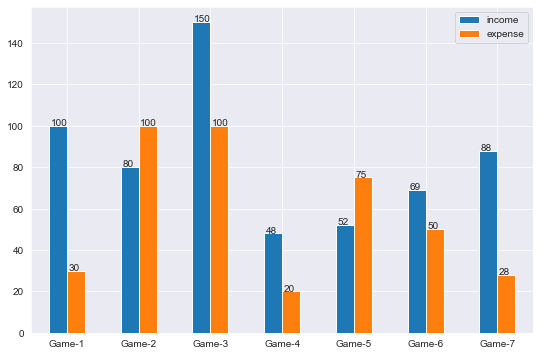

In [135]:
x =["Game-1", "Game-2", "Game-3", "Game-4", "Game-5", "Game-6", "Game-7"] 
ax = df.plot.bar(stacked=False, figsize=(9,6),rot=0)
plt.xticks(ticks=range(len(x)), labels=x)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.02, p.get_height()+0.2))

plt.show()



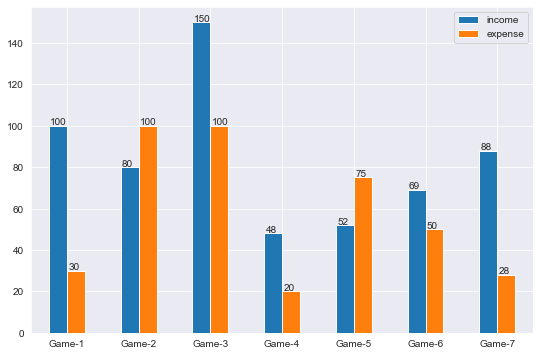

In [ ]:
## histograms

In [137]:
tips=sns.load_dataset("tips")

In [138]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 6. Histogram of the total_bill column

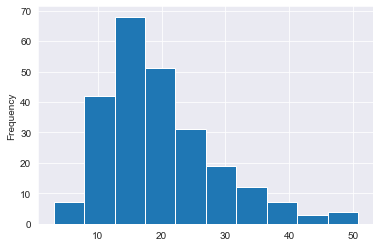

In [162]:
#Solution2
plt.hist(x=tips.total_bill)
plt.ylabel("Frequency");

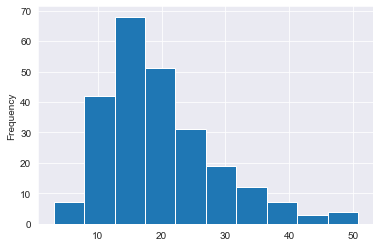

In [163]:
sns.histplot(data=tips["total_bill"],bins=10,alpha=1)
plt.xlabel("")
plt.ylabel("Frequency")
plt.show()

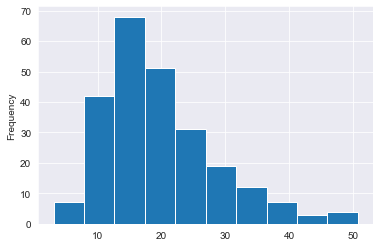

In [ ]:
## lineplots

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 7. Plot the avg tip by size  (lineplot)

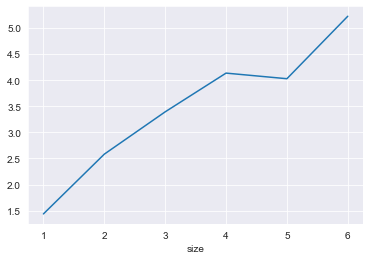

In [169]:
tips_avg = sns.lineplot(data=tips, x="size", y="tip", ci=None)
tips_avg.set_ylabel("");

<AxesSubplot:xlabel='size'>

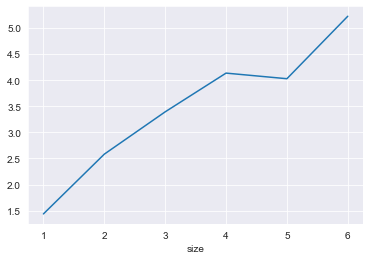

In [166]:
#pandas solution
tips.groupby('size').tip.mean().plot()

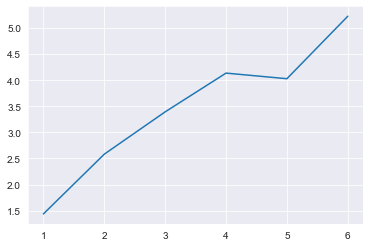

In [167]:
# matplotlib sol
plt.plot(tips.groupby("size")["tip"].mean())

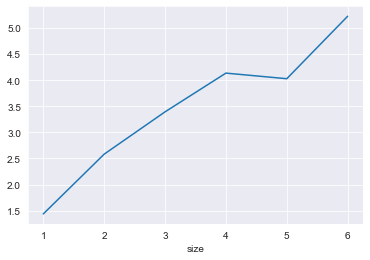

# 8.Set the linestyle as "--"

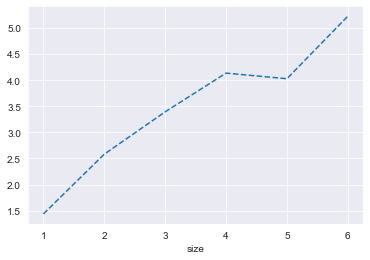

In [13]:
tips_avg = sns.lineplot(x=tips["size"], y=tips["tip"],linestyle="--", ci=None)
tips_avg.set_ylabel("");

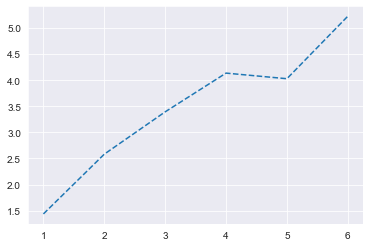

In [171]:
#matplotlib
plt.plot(tips.groupby("size")["tip"].mean(), ls="--");

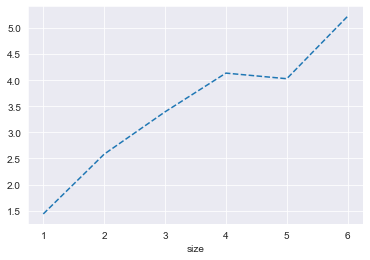

In [ ]:
## Scatter Plots

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 9. Make a scatter plot between tip and total_bill

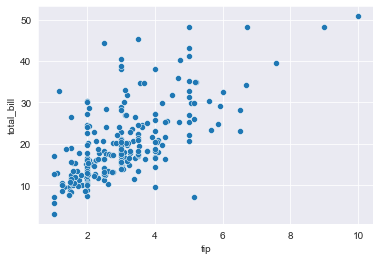

In [17]:
sns.scatterplot(x=tips["tip"], y=tips["total_bill"]);

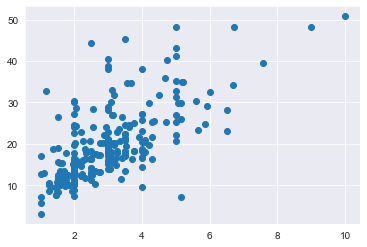

In [173]:
#matpl
plt.scatter(x=tips["tip"], y=tips["total_bill"]);

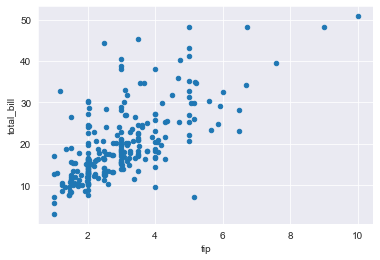

# 10. Set an additional dimension using size column

C:\Users\Samsung\AppData\Local\Temp\ipykernel_10076\1209801201.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.figure.colorbar(sm)


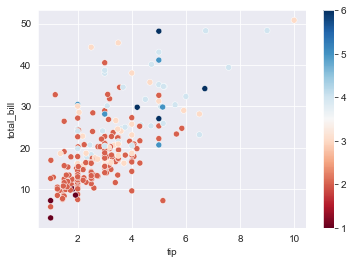

In [18]:
ax = sns.scatterplot(data=tips,x="tip", y="total_bill", hue="size", palette='RdBu')

norm = plt.Normalize(tips['size'].min(), tips['size'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)


# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.show()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_3504\914759901.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


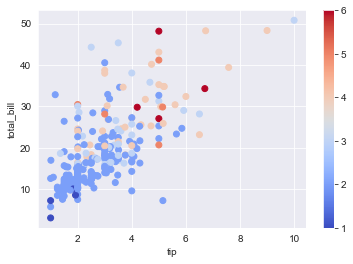

In [178]:
plt.scatter(tips["tip"], tips["total_bill"], c = tips["size"], cmap='coolwarm')
plt.colorbar()
plt.xlabel("tip")
plt.ylabel("total_bill")
plt.show()

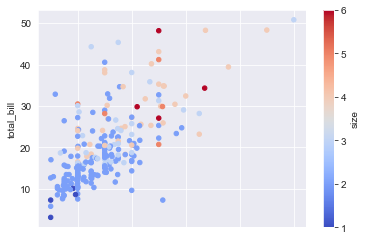

In [ ]:
## boxplots

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 11. Make the same plot using seaborn

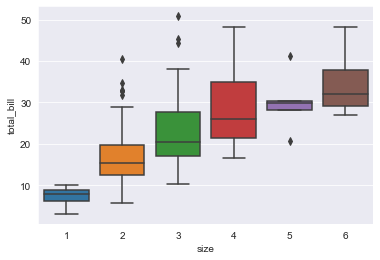

In [11]:
sns.boxplot(x=tips["size"], y=tips["total_bill"]);

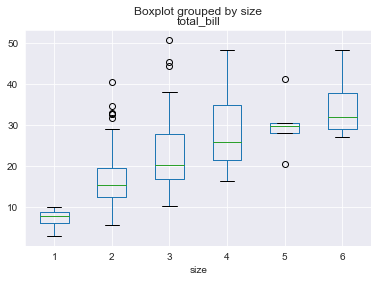

In [189]:
#matplotlib
tips.boxplot(column="total_bill", by="size");

In [ ]:
plt.boxplot()

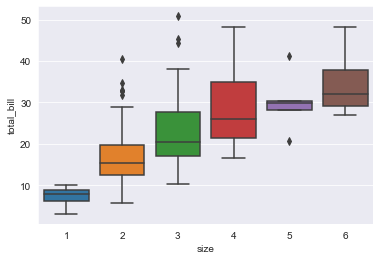

# 12. Make a violinplot instead of boxplot and discuss the difference between boxplot and violinplot

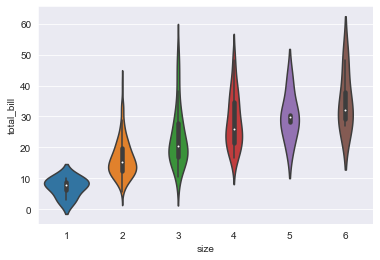

In [10]:
sns.violinplot(x=tips["size"], y=tips["total_bill"]);

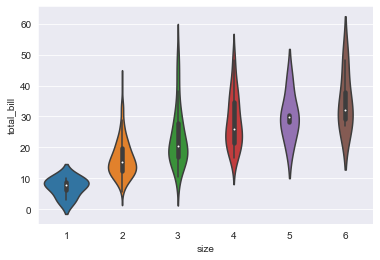